In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import os
import graphviz

In [4]:
ds_hmeq=pd.read_csv("../data/HMEQ.csv",engine='python')


In [5]:
ds_hmeq.head()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
ds_hmeq.isnull().sum(axis = 0)


BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
ds_hmeq["JOB"].fillna("Other",inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)


In [8]:
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
np.random.seed(1234)
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
ds_hmeq_test = ds_hmeq_dummy[~msk]

ds_hmeq_train_y= ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD",axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD",axis = 1, inplace = False)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_x.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))


train data X size : (2604, 18)
train data Y size : (2604, 18)
test data X size : (1144, 18)
test data Y size : (1144,)


In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(ds_hmeq_train_x,ds_hmeq_train_y)
print("Accurary on training set:{:.3f}".format(tree_uncustomized.score(ds_hmeq_train_x,ds_hmeq_train_y)))
print("Accurary on test set:{:.3f}".format(tree_uncustomized.score(ds_hmeq_test_x,ds_hmeq_test_y)))



Accurary on training set:1.000
Accurary on test set:0.927


In [11]:
train_accuracy = []
test_accuracy = []

para_criterion = ["gini","entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion= criterion, random_state= 1234)
    tree1.fit(ds_hmeq_train_x,ds_hmeq_train_y)
    train_accuracy.append(tree1.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(tree1.score(ds_hmeq_test_x,ds_hmeq_test_y))

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.927
1,entropy,1.0,0.921


In [12]:
# 깊이 변경
train_accuracy = []; test_accuracy=[]
para_criterion = []; para_max_depth = []

n_iter_depth = 10

list_criterion = ['gini','entropy']

for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=depth,random_state=1234)
        tree2.fit(ds_hmeq_train_x,ds_hmeq_train_y)

        train_accuracy.append(tree2.score(ds_hmeq_train_x,ds_hmeq_train_y))
        test_accuracy.append(tree2.score(ds_hmeq_test_x,ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)
        


In [13]:
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)



,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.924,0.927
1,gini,2,0.930,0.932
2,gini,3,0.931,0.932
3,gini,4,0.934,0.934
4,gini,5,0.937,0.934
5,gini,6,0.938,0.937
6,gini,7,0.944,0.934
7,gini,8,0.952,0.935
8,gini,9,0.959,0.936
9,gini,10,0.965,0.943


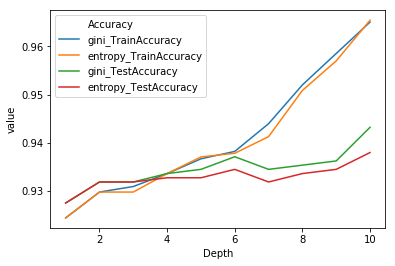

In [14]:
# 자기자신에만 영향을 받는 과적합상태
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars=["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"]=ds_accuracy2_melt["Criterion"]+ "_" + ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue = "Accuracy", data = ds_accuracy2_melt)



In [15]:
train_accuracy = []; test_accuracy = []

para_criterion = []; para_max_depth=[];para_min_leaf_size = []
# 최대깊이 10
max_depth= 10

list_min_leaf_size = [i*10 for i in range(1,6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_leaf=leafsize,random_state=1234)

        tree3.fit(ds_hmeq_train_x,ds_hmeq_train_y)
        train_accuracy.append(tree3.score(ds_hmeq_train_x,ds_hmeq_train_y))
        test_accuracy.append(tree3.score(ds_hmeq_test_x,ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)



In [16]:
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"]= para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)


,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.945,0.935
1,gini,10,20,0.931,0.924
2,gini,10,30,0.929,0.929
3,gini,10,40,0.926,0.924
4,gini,10,50,0.924,0.930
5,entropy,10,10,0.944,0.930
6,entropy,10,20,0.930,0.925
7,entropy,10,30,0.927,0.933
8,entropy,10,40,0.924,0.927
9,entropy,10,50,0.924,0.930


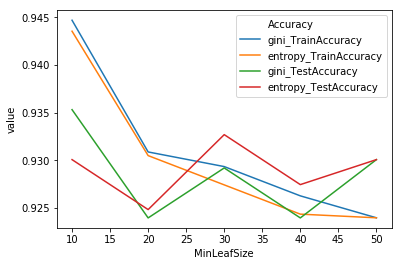

In [17]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue = "Accuracy", data= ds_accuracy3_melt)


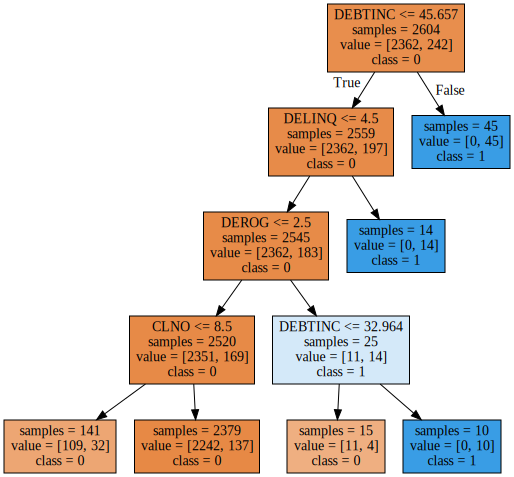

In [18]:
tree = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1234)

tree.fit(ds_hmeq_train_x,ds_hmeq_train_y)

export_graphviz(tree,out_file="tree.dot",class_names=["0","1"],
feature_names=ds_hmeq_train_x.columns,impurity = False, filled = True)

os.environ["PATH"] += os.pathsep + "./"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


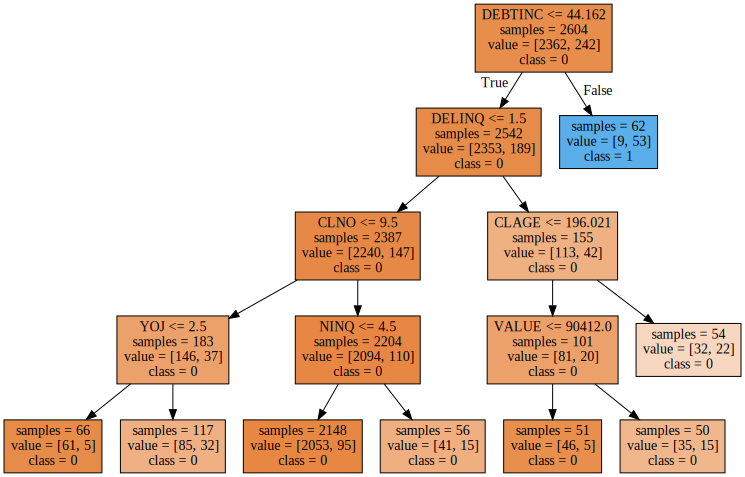

In [19]:
tree4 = DecisionTreeClassifier(criterion= "gini",max_depth=4,min_samples_leaf=50,random_state=1234)
tree5 = tree4.fit(ds_hmeq_train_x,ds_hmeq_train_y)
export_graphviz(tree5,out_file = "tree2.dot",class_names=["0","1"],
feature_names= ds_hmeq_train_x.columns,impurity = False, filled = True)

with open("tree2.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



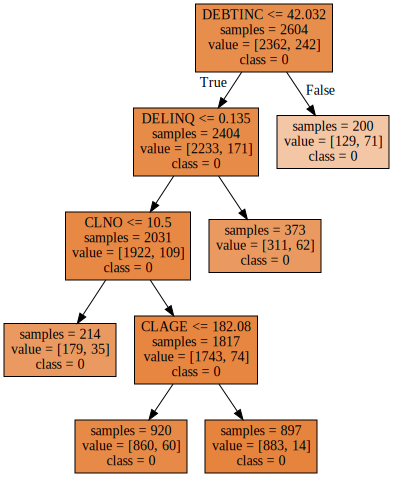

In [20]:
tree4 = DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf= 200,random_state=1234)
tree5 = tree4.fit(ds_hmeq_train_x,ds_hmeq_train_y)

export_graphviz(tree5,out_file="tree3.dot",class_names=["0","1"],
feature_names=ds_hmeq_train_x.columns,impurity = False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import os
import graphviz
import matplotlib.font_manager as font_manager

plt.rcParams['font.family'] = 'NamumBarunGothic'

In [22]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

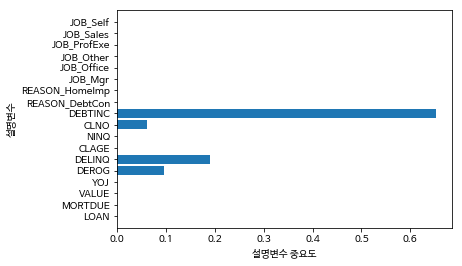

In [23]:
# 결론도출
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = ds_hmeq_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_

ds_feature_importance.sort_values("Importance",ascending = False)
ds_feature_importance.round(3)

def plot_feature_importances(model):
    n_features = ds_hmeq_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),ds_hmeq_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(tree)
